# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [67]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [68]:
# a)
m = 10
A1 = np.array([[np.random.randint(0,9) for i in range(m)] for j in range(m)])
b1 = np.array([np.random.randint(0,9) for j in range(m)])
# b)
A2,b2 = main.diag_dominant_matrix_A_b(m)
#c)
A3,b3 = main.symmetric_matrix_A_b(m)

## pomocnicze
ticks = np.array(["solve()","cg()","gmres()","jacobi()"])
checker_func = [lambda A : True, main.is_diag_dominant , main.is_symmetric]
check_matrixes = lambda array_of_mtx : np.all(np.array([k[1](k[0][0]) for k in zip(array_of_mtx,checker_func)]))
array = [[A1,b1],[A2,b1],[A3,b3]]
x = np.array([1,2,3,4])
residual = lambda A,b,x : np_linalg.norm(b-A@x)
x1 = np.matrix(np.ones((m, 1)))

***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

czy warunki spełnione : True


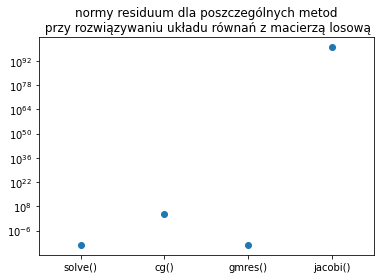

9.63 µs ± 364 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)
9.85 µs ± 345 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)
9.82 µs ± 240 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)
9.71 µs ± 581 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)


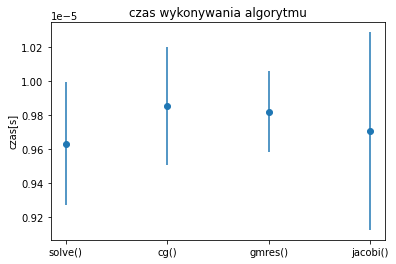

In [69]:
print(f"czy warunki spełnione : {check_matrixes(array)}")
plt.figure()

temp = np.ones([4])
# solve
i =array[0]
temp[0] = residual(i[0],i[1],np_linalg.solve(i[0],i[1]))
temp[1] = residual(i[0],i[1],sp.sparse.linalg.cg(i[0],i[1])[0])
temp[2] = residual(i[0],i[1],sp.sparse.linalg.gmres(i[0],i[1])[0])
temp[3] = residual(i[0],i[1],main.solve_jacobi(i[0],i[1],x1)[0])
plt.scatter(x,temp)
plt.yscale("log")
plt.xticks(x,ticks)
plt.xlim([0.5,4.5])
plt.title("normy residuum dla poszczególnych metod\n przy rozwiązywaniu układu równań z macierzą losową")
plt.show()
### testy czasowe
time_avg = np.ones([4])
time_std = np.ones([4])
saved_timing = %timeit -r 10 -n 100 -o np_linalg.solve(i[0],i[1])
time_avg[0] = saved_timing.average
time_std[0] = saved_timing.stdev
saved_timing = %timeit -r 10 -n 100 -o np_linalg.solve(i[0],i[1])
time_avg[1] = saved_timing.average
time_std[1] = saved_timing.stdev
saved_timing = %timeit -r 10 -n 100 -o np_linalg.solve(i[0],i[1])
time_avg[2] = saved_timing.average
time_std[2] = saved_timing.stdev
saved_timing = %timeit -r 10 -n 100 -o np_linalg.solve(i[0],i[1])
time_avg[3] = saved_timing.average
time_std[3] = saved_timing.stdev
plt.errorbar(x, time_avg, yerr=time_std, fmt='o')
plt.xticks(x,ticks)
plt.title("czas wykonywania algorytmu")
plt.ylabel("czas[s]")
plt.show()

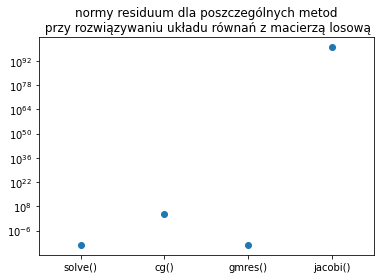

In [70]:
## bez jackobi()
# solve
i =array[0]
temp[0] = residual(i[0],i[1],np_linalg.solve(i[0],i[1]))
temp[1] = residual(i[0],i[1],sp.sparse.linalg.cg(i[0],i[1])[0])
temp[2] = residual(i[0],i[1],sp.sparse.linalg.gmres(i[0],i[1])[0])
temp[3] = residual(i[0],i[1],main.solve_jacobi(i[0],i[1],x1)[0])
plt.scatter(x,temp)
plt.yscale("log")
plt.xticks(x,ticks)
plt.xlim([0.5,4.5])
plt.title("normy residuum dla poszczególnych metod\n przy rozwiązywaniu układu równań z macierzą losową")
plt.show()

***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

czy warunki spełnione : True


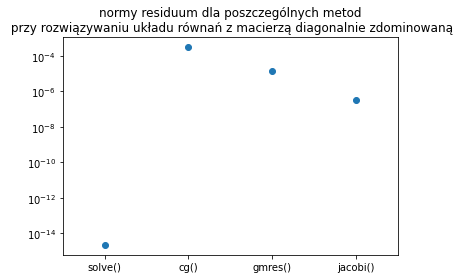

12.6 µs ± 7.23 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
11.9 µs ± 2.38 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
11.2 µs ± 1.61 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
9.91 µs ± 981 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)


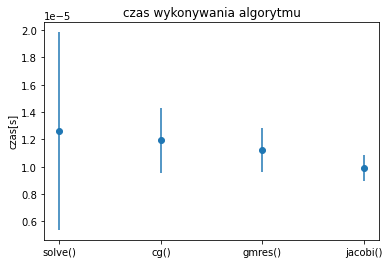

In [71]:
print(f"czy warunki spełnione : {check_matrixes(array)}")
plt.figure()
ticks = np.array(["solve()","cg()","gmres()","jacobi()"])
temp = np.ones([4])
# solve
i =array[1]
temp[0] = residual(i[0],i[1],np_linalg.solve(i[0],i[1]))
temp[1] = residual(i[0],i[1],sp.sparse.linalg.cg(i[0],i[1])[0])
temp[2] = residual(i[0],i[1],sp.sparse.linalg.gmres(i[0],i[1])[0])
temp[3] = residual(i[0],i[1],main.solve_jacobi(i[0],i[1],x1)[0])
plt.scatter(x,temp)
plt.yscale("log")
plt.xticks(x,ticks)
plt.xlim([0.5,4.5])
plt.title("normy residuum dla poszczególnych metod\n przy rozwiązywaniu układu równań z macierzą diagonalnie zdominowaną")
plt.show()
### testy czasowe
time_avg = np.ones([4])
time_std = np.ones([4])
saved_timing = %timeit -r 10 -n 100 -o np_linalg.solve(i[0],i[1])
time_avg[0] = saved_timing.average
time_std[0] = saved_timing.stdev
saved_timing = %timeit -r 10 -n 100 -o np_linalg.solve(i[0],i[1])
time_avg[1] = saved_timing.average
time_std[1] = saved_timing.stdev
saved_timing = %timeit -r 10 -n 100 -o np_linalg.solve(i[0],i[1])
time_avg[2] = saved_timing.average
time_std[2] = saved_timing.stdev
saved_timing = %timeit -r 10 -n 100 -o np_linalg.solve(i[0],i[1])
time_avg[3] = saved_timing.average
time_std[3] = saved_timing.stdev
plt.errorbar(x, time_avg, yerr=time_std, fmt='o')
plt.xticks(x,ticks)
plt.title("czas wykonywania algorytmu")
plt.ylabel("czas[s]")
plt.show()

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

czy warunki spełnione : True
nan


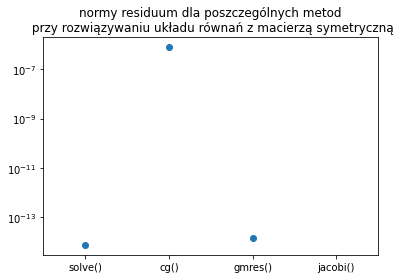

10.6 µs ± 1.23 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
9.99 µs ± 717 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)
9.98 µs ± 955 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)
10.6 µs ± 999 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)


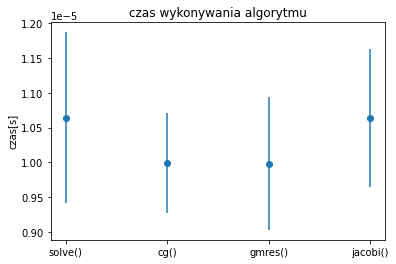

In [72]:
print(f"czy warunki spełnione : {check_matrixes(array)}")
plt.figure()
ticks = np.array(["solve()","cg()","gmres()","jacobi()"])
temp = np.ones([4])
# solve
i =array[2]
temp[0] = residual(i[0],i[1],np_linalg.solve(i[0],i[1]))
temp[1] = residual(i[0],i[1],sp.sparse.linalg.cg(i[0],i[1])[0])
temp[2] = residual(i[0],i[1],sp.sparse.linalg.gmres(i[0],i[1])[0])
temp[3] = residual(i[0],i[1],main.solve_jacobi(i[0],i[1],x1)[0])
print(temp[3])
plt.scatter(x,temp)
plt.yscale("log")
plt.xticks(x,ticks)
plt.xlim([0.5,4.5])
plt.title("normy residuum dla poszczególnych metod\n przy rozwiązywaniu układu równań z macierzą symetryczną")
plt.show()
### testy czasowe
time_avg = np.ones([4])
time_std = np.ones([4])
saved_timing = %timeit -r 10 -n 100 -o np_linalg.solve(i[0],i[1])
time_avg[0] = saved_timing.average
time_std[0] = saved_timing.stdev
saved_timing = %timeit -r 10 -n 100 -o np_linalg.solve(i[0],i[1])
time_avg[1] = saved_timing.average
time_std[1] = saved_timing.stdev
saved_timing = %timeit -r 10 -n 100 -o np_linalg.solve(i[0],i[1])
time_avg[2] = saved_timing.average
time_std[2] = saved_timing.stdev
saved_timing = %timeit -r 10 -n 100 -o np_linalg.solve(i[0],i[1])
time_avg[3] = saved_timing.average
time_std[3] = saved_timing.stdev
plt.errorbar(x, time_avg, yerr=time_std, fmt='o')
plt.xticks(x,ticks)
plt.title("czas wykonywania algorytmu")
plt.ylabel("czas[s]")
plt.show()

## Wnioski
Iteracyjne metody przyblirzonych rozwiązań układów równań posiadają mniejszą złożoność obliczeniową niż metody dokładne lecz niektóre z nich mogą nie dawać porządanych efektów tzn wraz z kolejnymi iteracjami rozwiązanie otrzymane nie zblirza się do rozwiązania dokładnego. Taki efekt daje obliczanie rozwiązania równania metodą Jakobiego dla macierzy nie ściśle diagonalno zdominowanych (nie jest spełniony warunek $|\lambda(D^{-1}(L+U))|<1$). Jeżeli chodzi o metodę gmres to daje ona najlepsze wyniki dla macierzy symetrycznych oraz dla macierzy czysto losowych. Metoda gradientów sprzężonych nadaje się tylko do liczenia wyniku układu równań jeżeli macierz jest symetryczna lub diagonalnie zdominowana. Funkcja solve() jest najbardziej użyteczna gdyż kożysta z różnych metod obliczania rozwiązania z uwagi na charakterystyczne własności ich macierzy lecz jest także najwolniejsza. Na labolatoriach nauczyłem się kożystać z podanych funkcjioraz poznałem ich dobre i złe strony. implementacja funkcji nie była trudna. Niestety jak zwykle nie da się za dużo powiedzieć o złożoności czasowej algorytmów gdyż z każdym uruchomieniem jupitera %timeit daje zupełnie różne wyniki.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)